# Load libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imort data

In [2]:
df = pd.read_csv("data/heart_attack_prediction_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

## Summary

In [4]:
summary_stats = df.describe()
summary_stats_all = df.describe(include='all')

In [5]:
# Display the results
print("Numerical Summary Statistics:")
print(summary_stats)

Numerical Summary Statistics:
               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026  

In [6]:
print("\nSummary Statistics for All Columns:")
print(summary_stats_all)


Summary Statistics for All Columns:
       Patient ID          Age   Sex  Cholesterol Blood Pressure   Heart Rate  \
count        8763  8763.000000  8763  8763.000000           8763  8763.000000   
unique       8763          NaN     2          NaN           3915          NaN   
top       BMW7812          NaN  Male          NaN         146/94          NaN   
freq            1          NaN  6111          NaN              8          NaN   
mean          NaN    53.707977   NaN   259.877211            NaN    75.021682   
std           NaN    21.249509   NaN    80.863276            NaN    20.550948   
min           NaN    18.000000   NaN   120.000000            NaN    40.000000   
25%           NaN    35.000000   NaN   192.000000            NaN    57.000000   
50%           NaN    54.000000   NaN   259.000000            NaN    75.000000   
75%           NaN    72.000000   NaN   330.000000            NaN    93.000000   
max           NaN    90.000000   NaN   400.000000            NaN   110.0

# Gender Analysis

C:\Users\mkemb\AppData\Local\Temp\ipykernel_125908\4080220347.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Sex", palette="pastel")


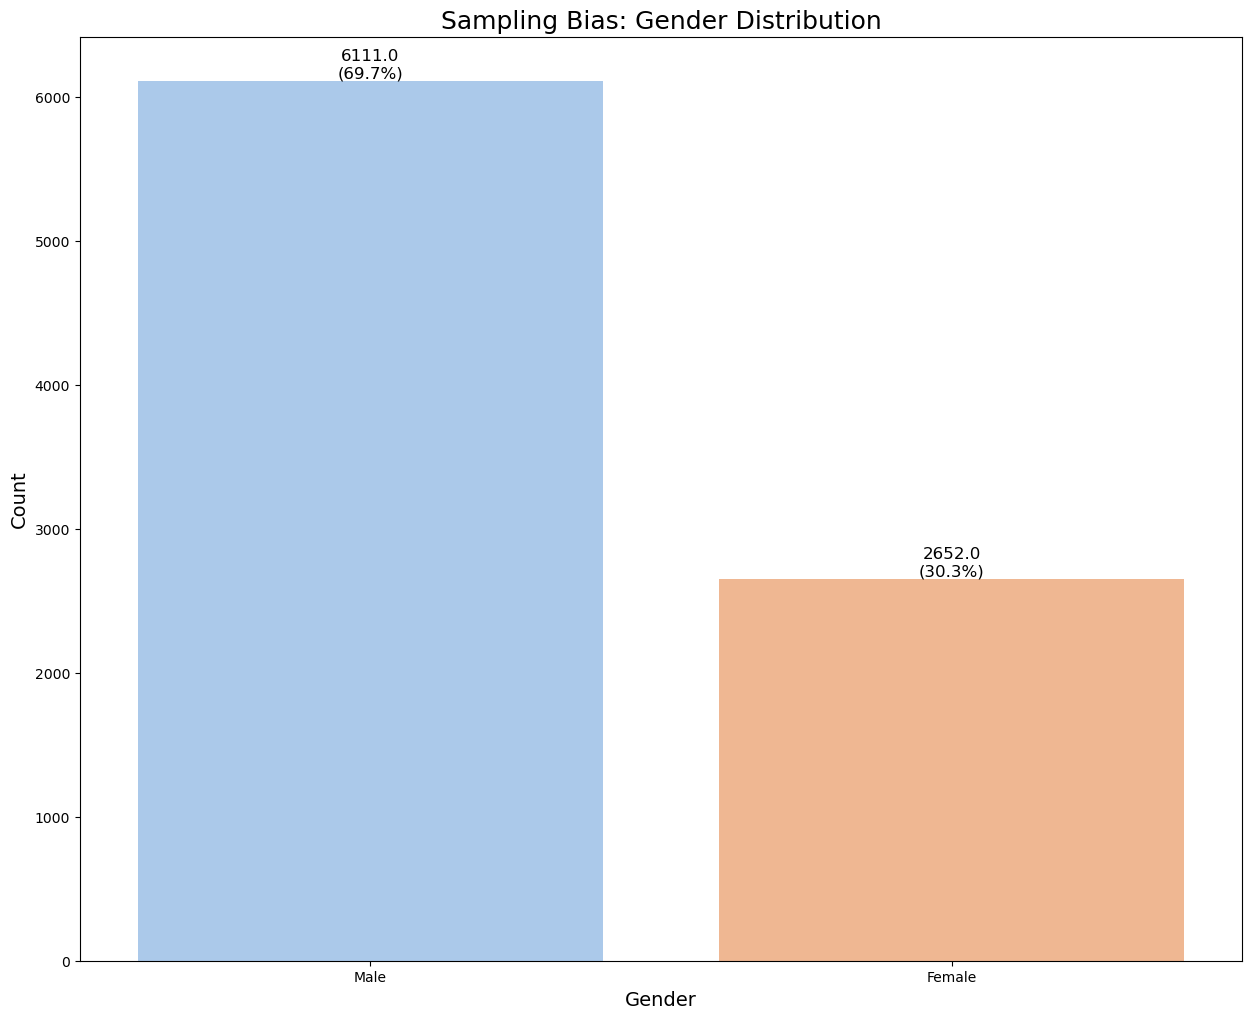

In [7]:
# Set figure size
plt.figure(figsize=(15,12))

# Create a countplot with different colors for each gender
ax = sns.countplot(data=df, x="Sex", palette="pastel")

# Add numbers and percentages above each bar
total = len(df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Display count and percentage
    ax.annotate(f'{count}\n({percentage})', (x, y), ha='center', va='bottom', fontsize=12, color='black')

# Add title and labels
plt.title("Sampling Bias: Gender Distribution", fontsize=18)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show plot
plt.show()

In [8]:
gender_counts = df["Sex"].value_counts(normalize=True) * 100
print("Gender Distribution:\n", gender_counts)

Gender Distribution:
 Sex
Male      69.736392
Female    30.263608
Name: proportion, dtype: float64


## Summary

# Income Distribution 

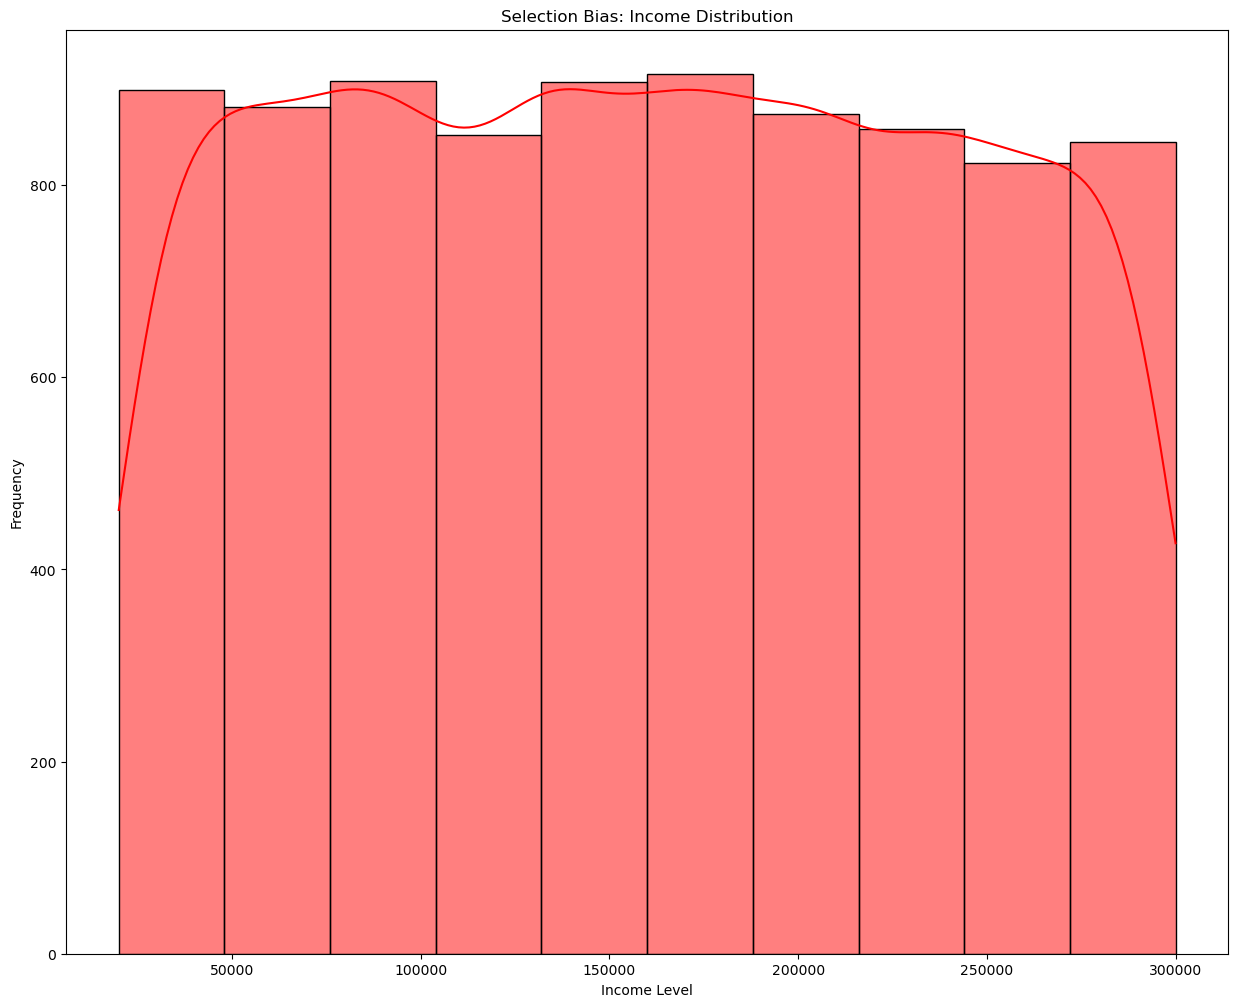

In [9]:
plt.figure(figsize=(15,12))
sns.histplot(df["Income"], bins=10, kde=True, color="red")
plt.title("Selection Bias: Income Distribution")
plt.xlabel("Income Level")
plt.ylabel("Frequency")
plt.show()

# Continents and Top countries

C:\Users\mkemb\AppData\Local\Temp\ipykernel_125908\2021543633.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="Continent", palette="pastel", order=continent_order)


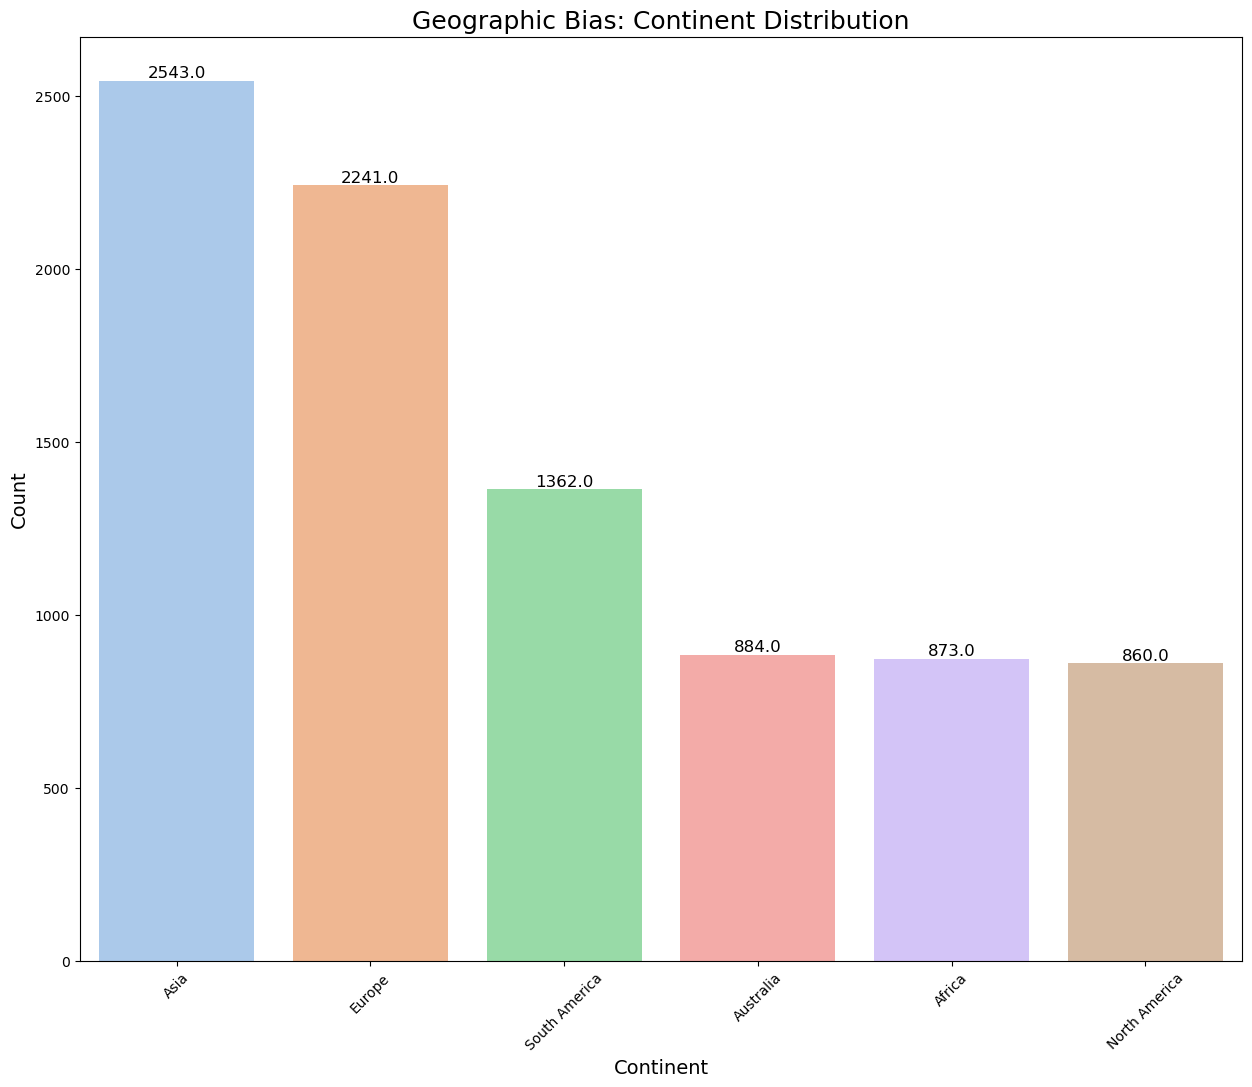

In [10]:
# Calculate the count of each continent and sort it in descending order
continent_order = df["Continent"].value_counts().index

# Set figure size
plt.figure(figsize=(15, 12))

# Create countplot for continent distribution, sorting by the count in descending order
ax = sns.countplot(data=df, x="Continent", palette="pastel", order=continent_order)

# Add counts on top of each bar
for bar in ax.patches:
    count = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y, f'{count}', ha='center', va='bottom', fontsize=12, color='black')

# Customize title and labels
plt.title("Geographic Bias: Continent Distribution", fontsize=18)
plt.xlabel("Continent", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Summary

C:\Users\mkemb\AppData\Local\Temp\ipykernel_125908\1113830627.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette="pastel")


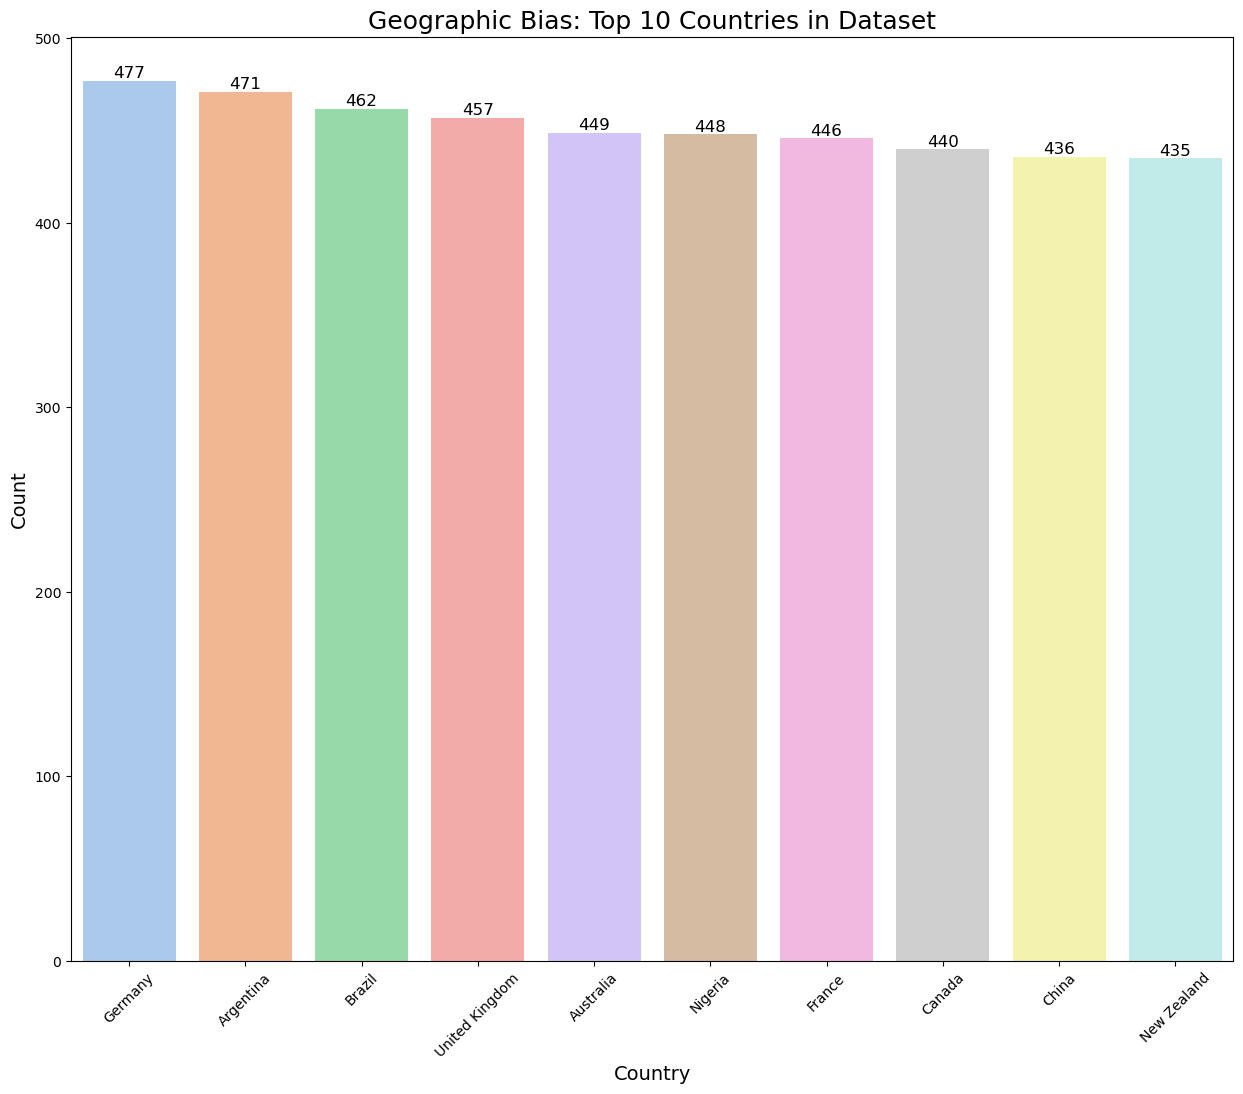

In [11]:
# Get the top 10 countries by count
top_countries = df["Country"].value_counts().nlargest(10)

# Set figure size
plt.figure(figsize=(15, 12))

# Create barplot with custom colors
ax = sns.barplot(x=top_countries.index, y=top_countries.values, palette="pastel")

# Add counts on top of each bar
for bar in ax.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y, f'{count}', ha='center', va='bottom', fontsize=12, color='black')

# Customize title and labels
plt.title("Geographic Bias: Top 10 Countries in Dataset", fontsize=18)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

C:\Users\mkemb\AppData\Local\Temp\ipykernel_125908\2139058543.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bottom_countries.index, y=bottom_countries.values, palette="pastel")


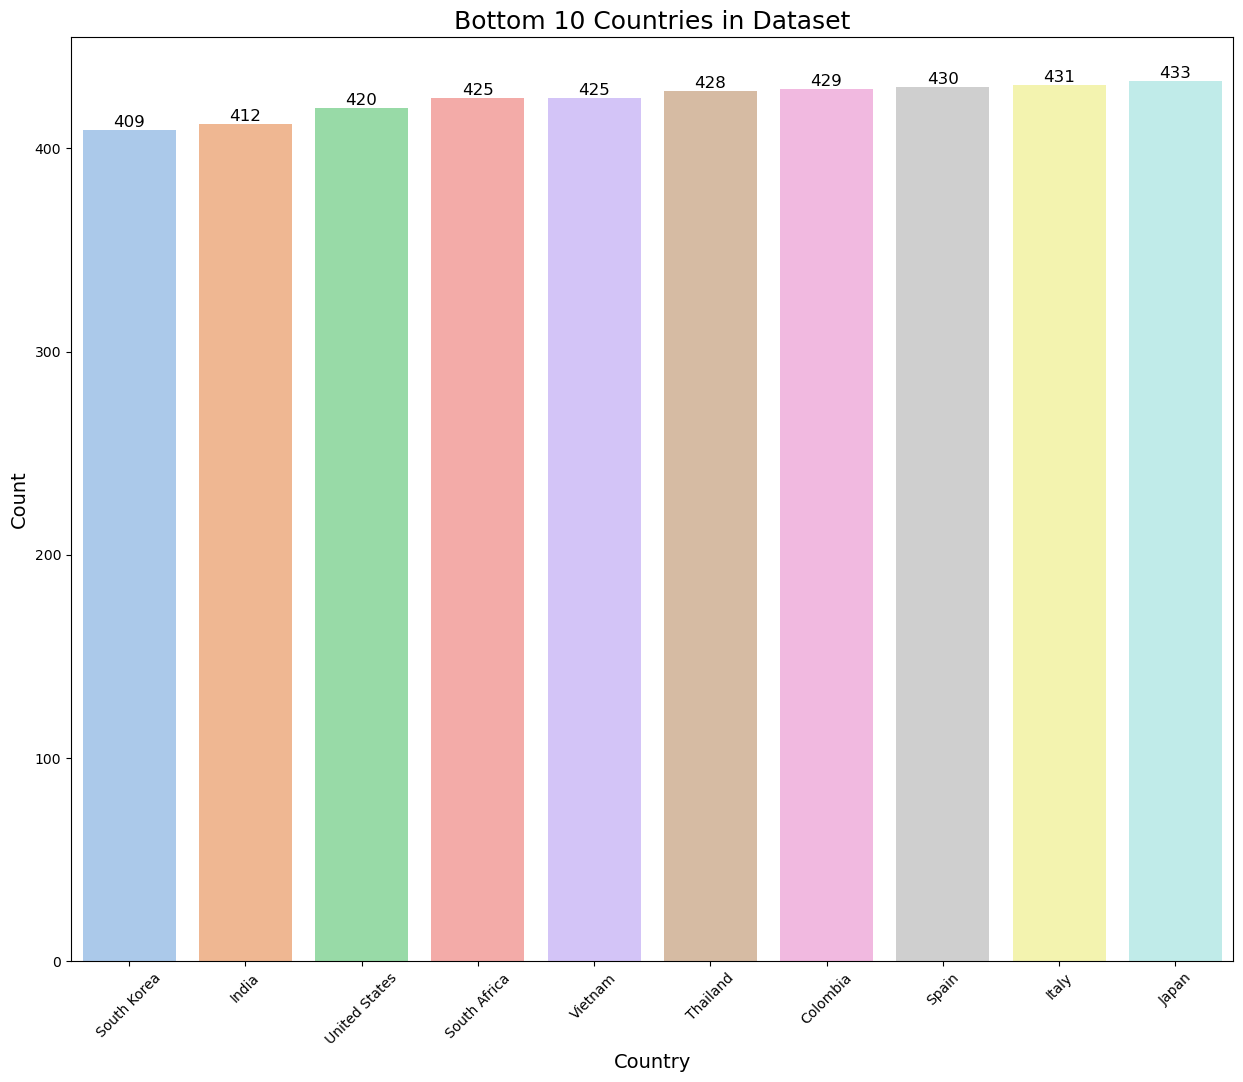

In [12]:
# Get the bottom 10 countries by count
bottom_countries = df["Country"].value_counts().nsmallest(10)

# Set figure size
plt.figure(figsize=(15, 12))

# Create barplot with custom colors
ax = sns.barplot(x=bottom_countries.index, y=bottom_countries.values, palette="pastel")

# Add counts on top of each bar
for bar in ax.patches:
    count = int(bar.get_height())
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y, f'{count}', ha='center', va='bottom', fontsize=12, color='black')

# Customize title and labels
plt.title("Bottom 10 Countries in Dataset", fontsize=18)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Income per Gender per continent

In [13]:
# Calculate average income per gender per continent
avg_income = df.groupby(['Continent', 'Sex'])['Income'].mean().reset_index()

# Rename the columns for better readability
avg_income.columns = ['Continent', 'Gender', 'Average Income']

# Display the result
print(avg_income)

        Continent  Gender  Average Income
0          Africa  Female   160894.136719
1          Africa    Male   157560.178282
2            Asia  Female   156358.745695
3            Asia    Male   159362.116890
4       Australia  Female   153334.416667
5       Australia    Male   160179.363924
6          Europe  Female   160271.440000
7          Europe    Male   156826.547696
8   North America  Female   152152.106299
9   North America    Male   159300.552805
10  South America  Female   161228.887356
11  South America    Male   157945.772384


## Summary

In [14]:
print(df.columns)

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')


In [15]:
df_male = df[df['Sex'] == 'Male']
df_female = df[df['Sex'] == 'Female']

In [16]:
numeric_columns = df.drop(columns=['Patient ID', 'Sex', 'Country', 'Continent', 'Hemisphere']).select_dtypes(include=['float64', 'int64']).columns

In [17]:
correlation_male = df_male[numeric_columns].corrwith(df_male['Heart Attack Risk']).sort_values(ascending=False)
top_10_male_factors = correlation_male.head(10)
print("Top 10 Factors Causing Heart Attack in Males:")
print(top_10_male_factors)

Top 10 Factors Causing Heart Attack in Males:
Heart Attack Risk                  1.000000
Exercise Hours Per Week            0.024520
Diabetes                           0.010580
Age                                0.010548
Cholesterol                        0.009986
Triglycerides                      0.009169
Family History                     0.006364
Previous Heart Problems            0.003563
Physical Activity Days Per Week    0.003061
Income                            -0.000013
dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [18]:
correlation_female = df_female[numeric_columns].corrwith(df_female['Heart Attack Risk']).sort_values(ascending=False)
top_10_female_factors = correlation_female.head(10)
print("\nTop 10 Factors Causing Heart Attack in Females:")
print(top_10_female_factors)


Top 10 Factors Causing Heart Attack in Females:
Heart Attack Risk          1.000000
Cholesterol                0.040986
Diabetes                   0.032496
Medication Use             0.032196
Income                     0.032024
BMI                        0.027908
Triglycerides              0.013405
Age                       -0.003342
Previous Heart Problems   -0.007341
Heart Rate                -0.007825
dtype: float64


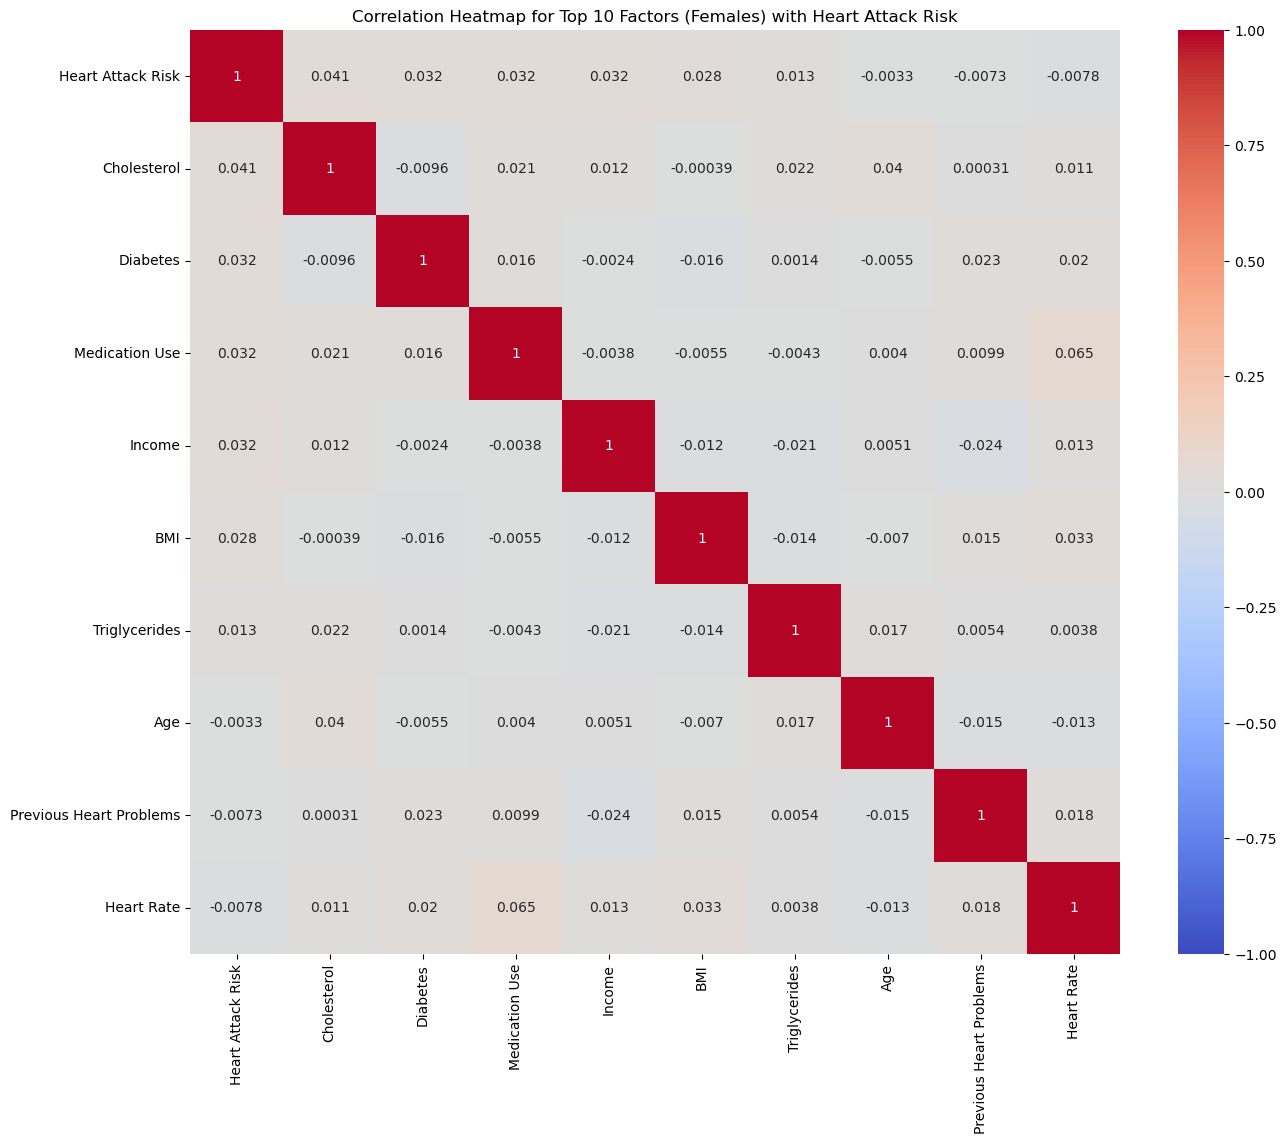

In [19]:
correlation_female = df_female[numeric_columns].corrwith(df_female['Heart Attack Risk']).sort_values(ascending=False)
top_10_female_factors = correlation_female.head(10).index
correlation_female_top_10 = df_female[top_10_female_factors].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_female_top_10, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Top 10 Factors (Females) with Heart Attack Risk')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


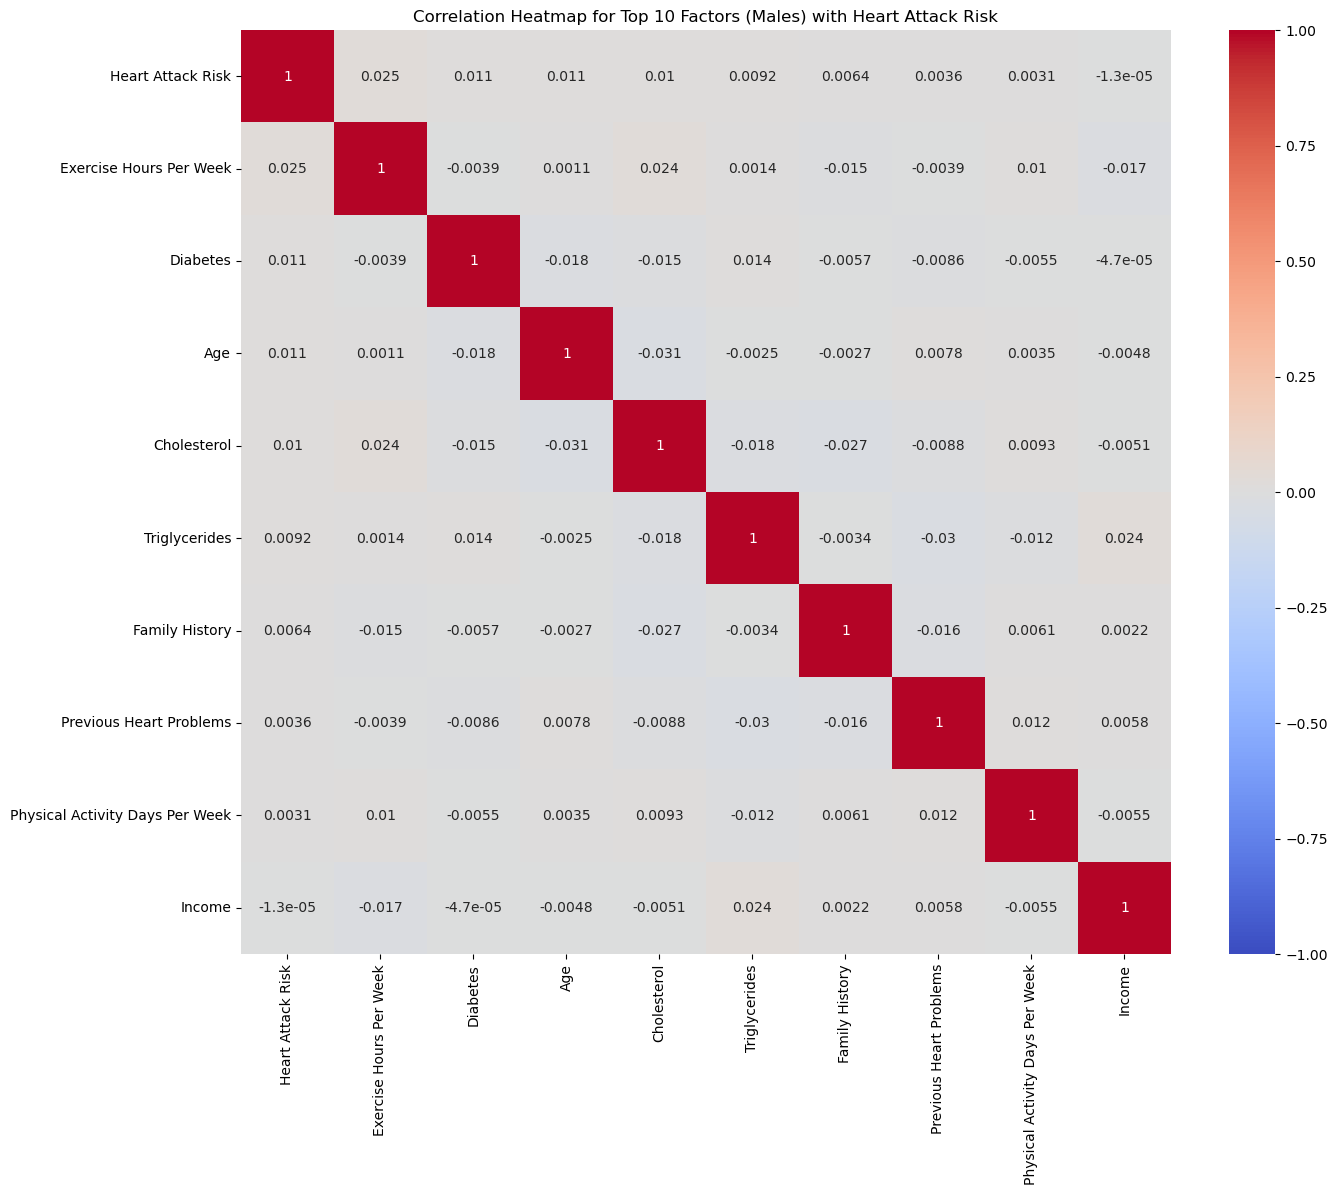

In [20]:
correlation_male = df_male[numeric_columns].corrwith(df_male['Heart Attack Risk']).sort_values(ascending=False)
top_10_male_factors = correlation_male.head(10).index
correlation_male_top_10 = df_male[top_10_male_factors].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_male_top_10, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Top 10 Factors (Males) with Heart Attack Risk')
plt.show()

## Summary